# Lab 3: Sun Data Analysis

In [1]:
import numpy as np
import ugradio
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import astropy
from itertools import chain
from scipy import signal
import scipy

In [2]:
plt.rc('font',**{'family':'serif','serif':['cmr10'], 'size':12})
plt.rc('text', usetex=True)

In [3]:
sun3 = np.load('sun_mar29.npz')
sun3_times = sun3['unitimes']
sun3_volts = sun3['volts']

## Observed Local Fringe Frequencies

RuntimeError: LaTeX was not able to process the following string:
'Power [W^2]'
Here is the full report generated by LaTeX: 

This is pdfTeX, Version 3.14159265-2.6-1.40.15 (TeX Live 2014) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./ce55bacaa20956b508cc0231e1eef146.tex
LaTeX2e <2014/05/01>
Babel <3.9l> and hyphenation patterns for 79 languages loaded.
(/home/apps/texlive/2014/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/home/apps/texlive/2014/texmf-dist/tex/latex/base/size10.clo))
(/home/apps/texlive/2014/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/home/apps/texlive/2014/texmf-dist/tex/latex/psnfss/helvet.sty
(/home/apps/texlive/2014/texmf-dist/tex/latex/graphics/keyval.sty))
(/home/apps/texlive/2014/texmf-dist/tex/latex/psnfss/courier.sty)
(/home/apps/texlive/2014/texmf-dist/tex/latex/base/textcomp.sty
(/home/apps/texlive/2014/texmf-dist/tex/latex/base/ts1enc.def))
(/home/apps/texlive/2014/texmf-dist/tex/latex/geometry/geometry.sty
(/home/apps/texlive/2014/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/home/apps/texlive/2014/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/home/apps/texlive/2014/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file ce55bacaa20956b508cc0231e1eef146.aux.
(/home/apps/texlive/2014/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.12 ...{18.000000}{22.500000}{\rmfamily Power [W^
                                                  2]}
! Extra }, or forgotten $.
l.12 ....000000}{22.500000}{\rmfamily Power [W^2]}
                                                  
! Missing $ inserted.
<inserted text> 
                $
l.13 \end{document}
                   
[1] (./ce55bacaa20956b508cc0231e1eef146.aux) )
(\end occurred inside a group at level 1)

### simple group (level 1) entered at line 12 ({)
### bottom level
(see the transcript file for additional information)
Output written on ce55bacaa20956b508cc0231e1eef146.dvi (1 page, 312 bytes).
Transcript written on ce55bacaa20956b508cc0231e1eef146.log.


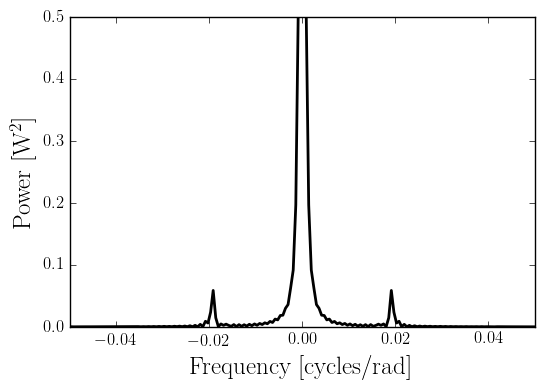

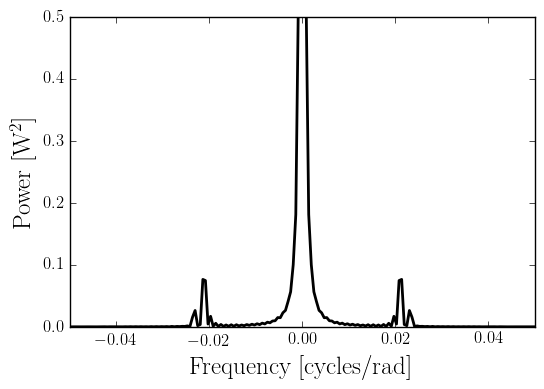

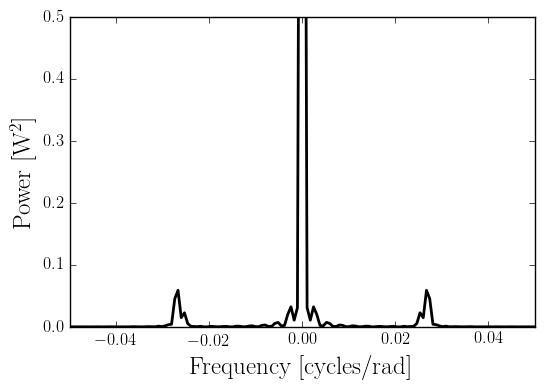

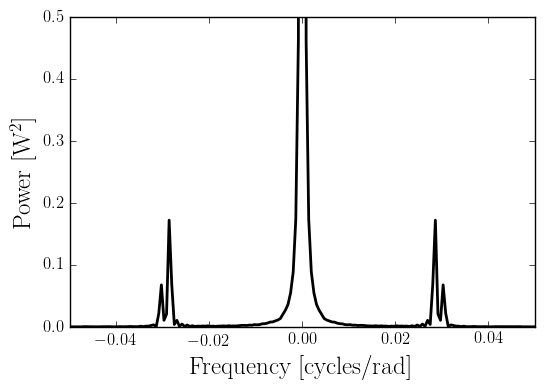

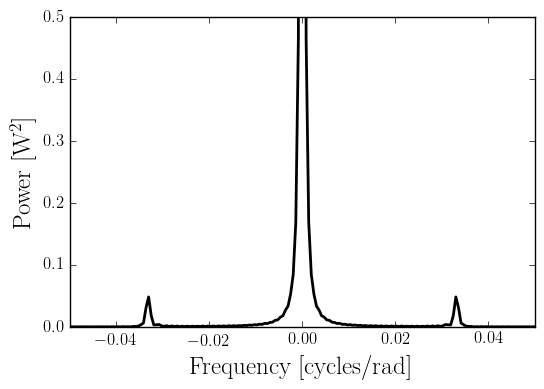

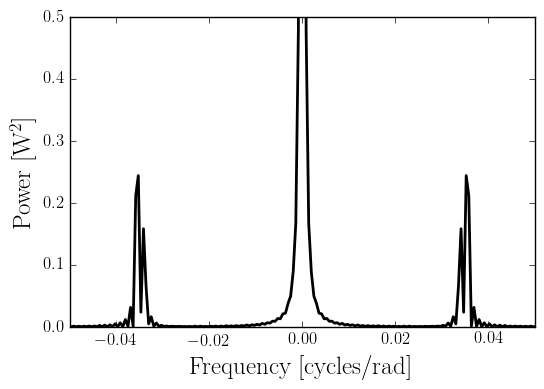

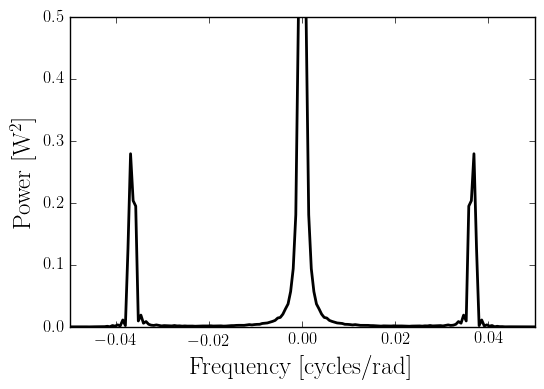

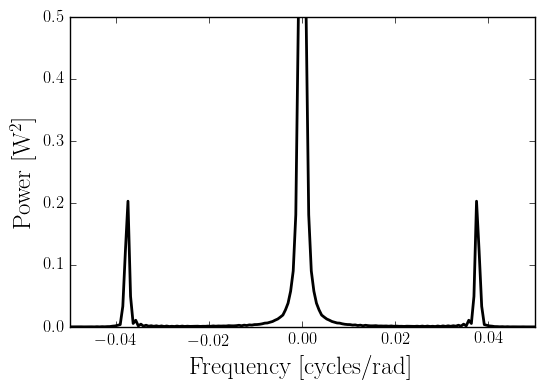

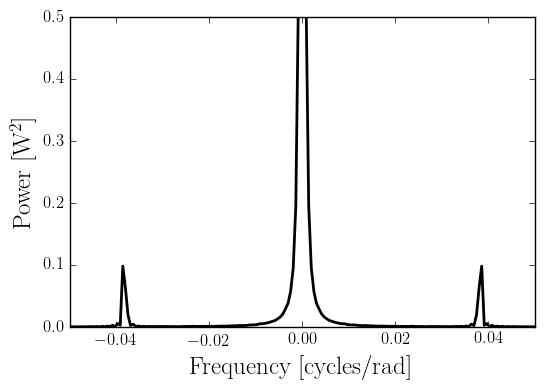

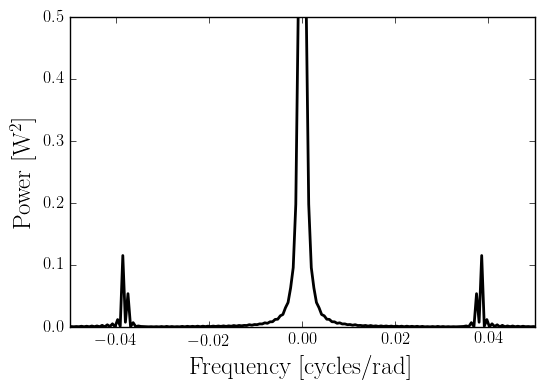

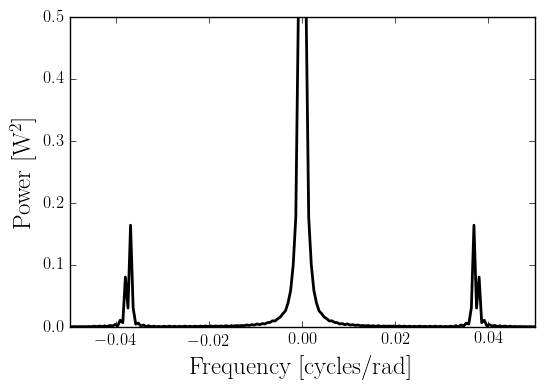

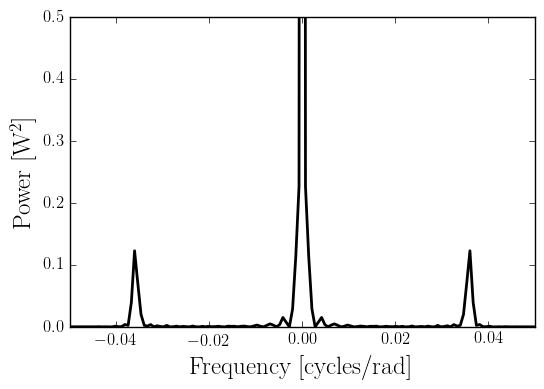

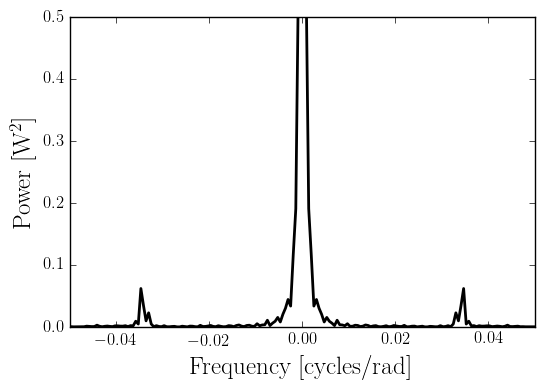

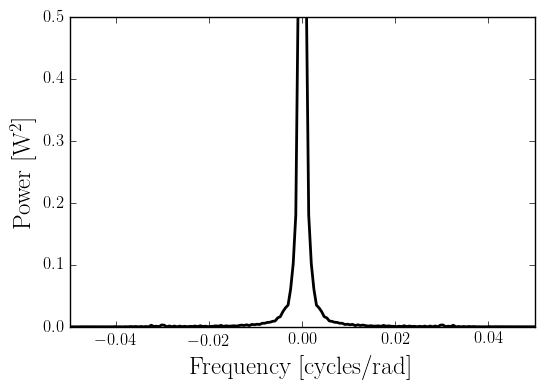

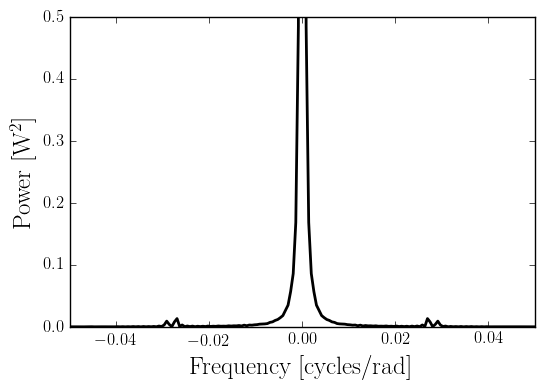

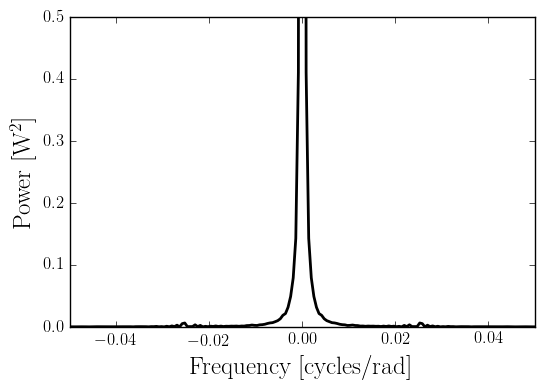

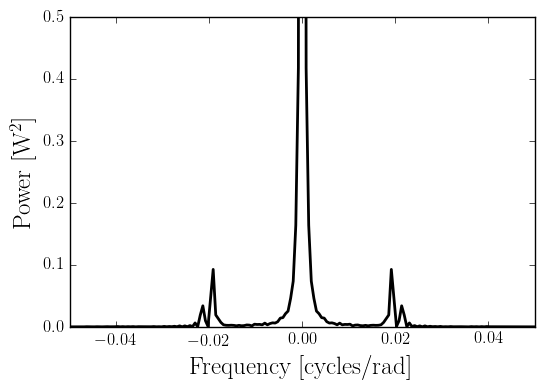

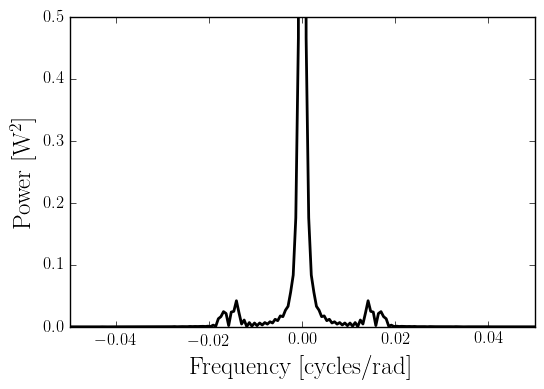

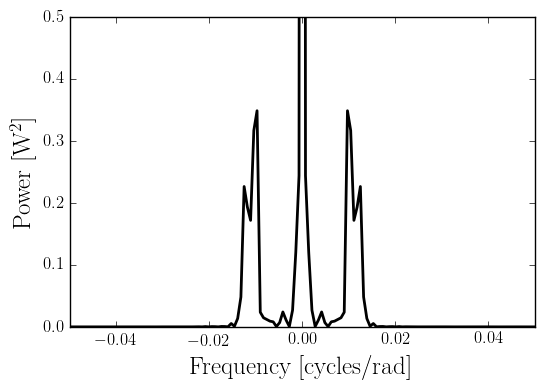

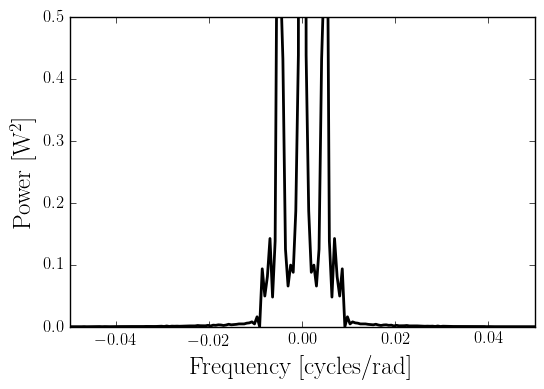

In [47]:
for i in range(len(sun3_volts)-1):
    freq,fx = ugradio.dft.dft(sun3_volts[i], sun3_times[i])
    power = np.abs(fx)**2
    plt.plot(freq, power, "k", linewidth=2)
    #plt.title("Fourier Transform of Sun Data")
    #if i >= len(sun3_volts)-3:
    plt.xlabel("Frequency [cycles/rad]", fontsize=18)
    plt.ylabel("Power [W^2]", fontsize=18)
    plt.xlim(-.05, .05)
    plt.ylim(0, 0.5)
    plt.show()

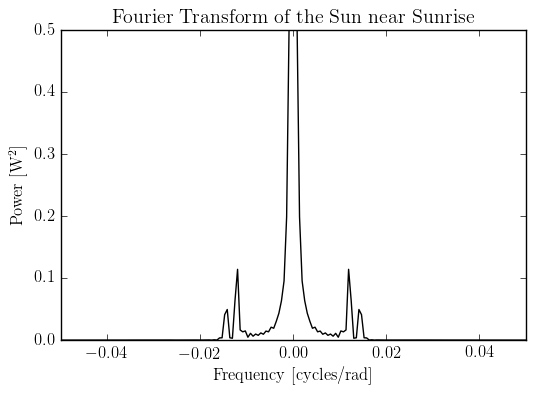

array([-0.01193781, -0.00138812, -0.00083287, -0.00027762,  0.00027762,
        0.00083287,  0.00138812,  0.01193781])

In [9]:
freq,fx = ugradio.dft.dft(sun3_volts[0], sun3_times[0])
power = np.abs(fx)**2
plt.plot(freq, power, "k")
plt.title("Fourier Transform of the Sun near Sunrise")
plt.xlabel("Frequency [cycles/rad]")
plt.ylabel("Power [W^2]")
plt.xlim(-.05, .05)
plt.ylim(0, 0.5)
plt.show()

spikes = np.where(power > 0.1)
freq[spikes]

# first and last numbers are fringe frequencies?

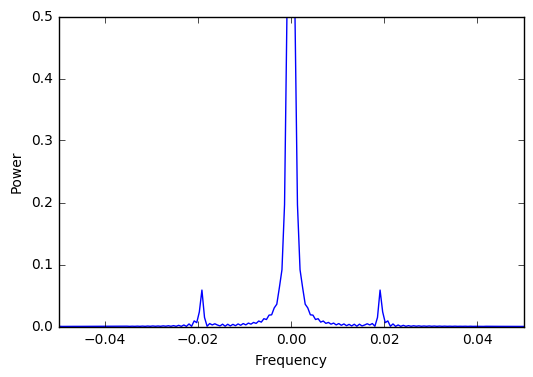

array([-0.01915602, -0.00249861, -0.00194336, -0.00138812, -0.00083287,
       -0.00027762,  0.00027762,  0.00083287,  0.00138812,  0.00194336,
        0.00249861,  0.01915602])

In [4]:
freq,fx = ugradio.dft.dft(sun3_volts[1], sun3_times[1])
power = np.abs(fx)**2
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.xlim(-.05, .05)
plt.ylim(0, 0.5)
plt.show()

spikes = np.where(power > 0.05)
freq[spikes]

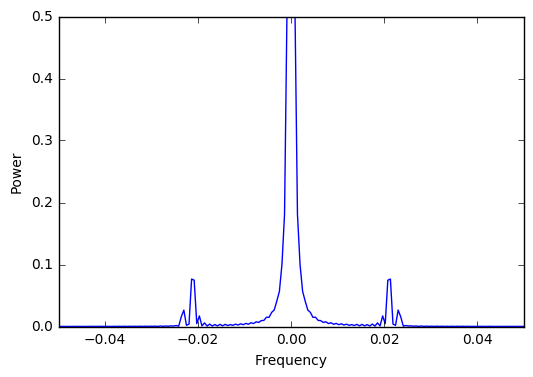

array([-0.02137701, -0.02082177, -0.00249861, -0.00194336, -0.00138812,
       -0.00083287, -0.00027762,  0.00027762,  0.00083287,  0.00138812,
        0.00194336,  0.00249861,  0.02082177,  0.02137701])

In [8]:
freq,fx = ugradio.dft.dft(sun3_volts[2], sun3_times[2])
power = np.abs(fx)**2
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.xlim(-.05, .05)
plt.ylim(0, 0.5)
plt.show()

spikes = np.where(power > 0.05)
freq[spikes]

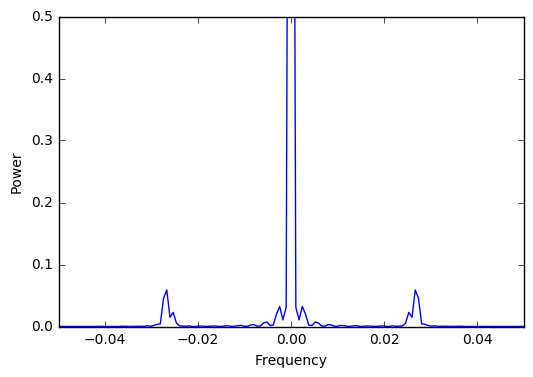

array([-4.00069396e-01, -2.00208189e-01, -2.67175573e-02, -3.46981263e-04,
        3.46981263e-04,  2.67175573e-02,  2.00208189e-01,  4.00069396e-01])

In [17]:
freq,fx = ugradio.dft.dft(sun3_volts[3], sun3_times[3])
power = np.abs(fx)**2
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.xlim(-.05, .05)
plt.ylim(0, 0.5)
plt.show()

spikes = np.where(power > 0.05)
freq[spikes]

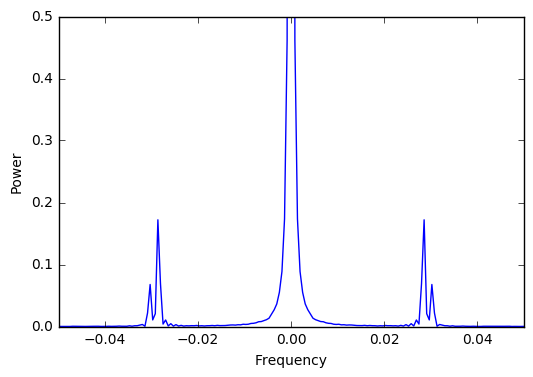

array([-0.02862702, -0.00138966, -0.0008338 , -0.00027793,  0.00027793,
        0.0008338 ,  0.00138966,  0.02862702])

In [16]:
freq,fx = ugradio.dft.dft(sun3_volts[4], sun3_times[4])
power = np.abs(fx)**2
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.xlim(-.05, .05)
plt.ylim(0, 0.5)
plt.show()

spikes = np.where(power > 0.1)
freq[spikes]

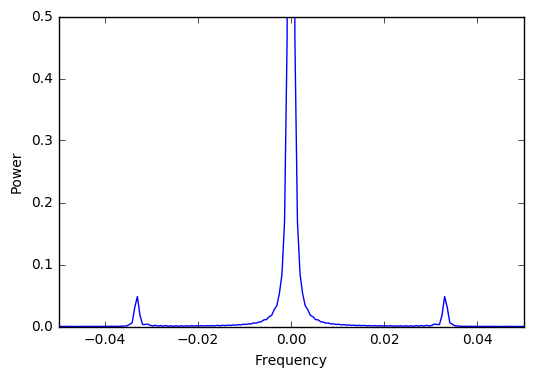

array([-0.03359245, -0.0330372 , -0.00305386, -0.00249861, -0.00194336,
       -0.00138812, -0.00083287, -0.00027762,  0.00027762,  0.00083287,
        0.00138812,  0.00194336,  0.00249861,  0.00305386,  0.0330372 ,
        0.03359245])

In [20]:
freq,fx = ugradio.dft.dft(sun3_volts[5], sun3_times[5])
power = np.abs(fx)**2
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.xlim(-.05, .05)
plt.ylim(0, 0.5)
plt.show()

spikes = np.where(power > 0.03)
freq[spikes]

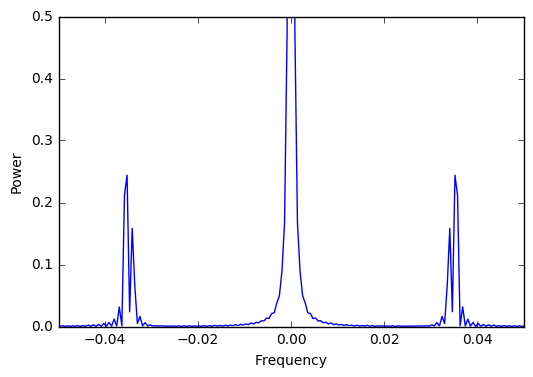

array([-0.03525819, -0.00083287, -0.00027762,  0.00027762,  0.00083287,
        0.03525819])

In [24]:
freq,fx = ugradio.dft.dft(sun3_volts[6], sun3_times[6])
power = np.abs(fx)**2
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.xlim(-.05, .05)
plt.ylim(0, 0.5)
plt.show()

spikes = np.where(power > 0.24)
freq[spikes]

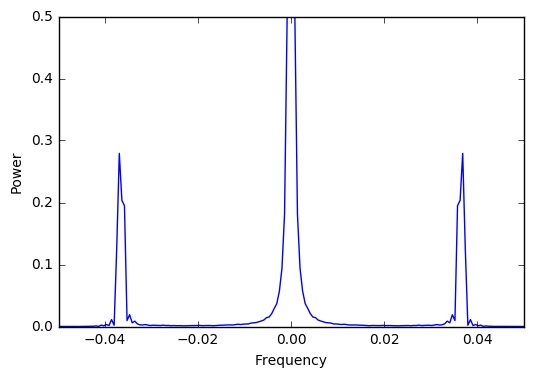

array([-0.03692393, -0.00083287, -0.00027762,  0.00027762,  0.00083287,
        0.03692393])

In [25]:
freq,fx = ugradio.dft.dft(sun3_volts[7], sun3_times[7])
power = np.abs(fx)**2
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.xlim(-.05, .05)
plt.ylim(0, 0.5)
plt.show()

spikes = np.where(power > 0.24)
freq[spikes]

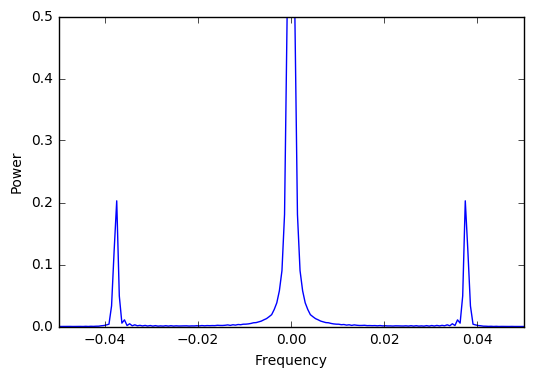

array([-0.03747918, -0.00083287, -0.00027762,  0.00027762,  0.00083287,
        0.03747918])

In [27]:
freq,fx = ugradio.dft.dft(sun3_volts[8], sun3_times[8])
power = np.abs(fx)**2
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.xlim(-.05, .05)
plt.ylim(0, 0.5)
plt.show()

spikes = np.where(power > 0.2)
freq[spikes]

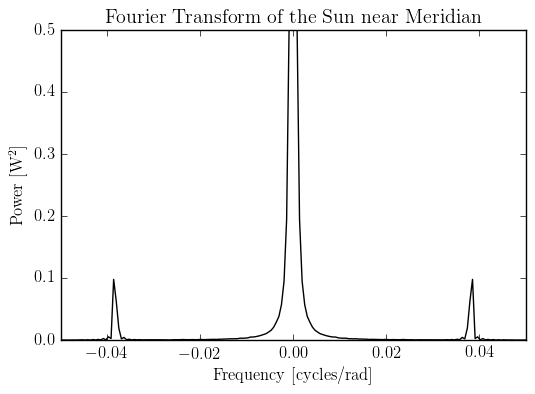

array([-0.03858967, -0.00194336, -0.00138812, -0.00083287, -0.00027762,
        0.00027762,  0.00083287,  0.00138812,  0.00194336,  0.03858967])

In [10]:
freq,fx = ugradio.dft.dft(sun3_volts[9], sun3_times[9])
power = np.abs(fx)**2
plt.plot(freq, power, "k")
plt.title("Fourier Transform of the Sun near Meridian")
plt.xlabel("Frequency [cycles/rad]")
plt.ylabel("Power [W^2]")
plt.xlim(-.05, .05)
plt.ylim(0, 0.5)
plt.show()

spikes = np.where(power > 0.08)
freq[spikes]

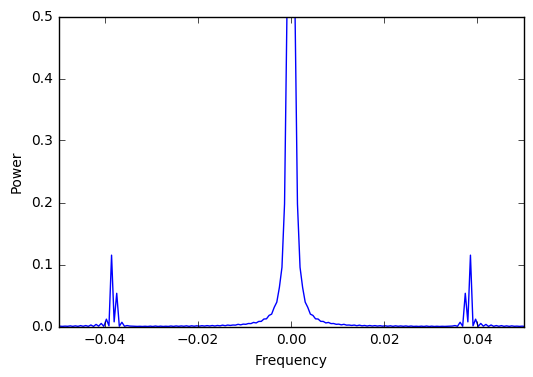

array([-0.03858967, -0.00138812, -0.00083287, -0.00027762,  0.00027762,
        0.00083287,  0.00138812,  0.03858967])

In [31]:
freq,fx = ugradio.dft.dft(sun3_volts[10], sun3_times[10])
power = np.abs(fx)**2
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.xlim(-.05, .05)
plt.ylim(0, 0.5)
plt.show()

spikes = np.where(power > 0.1)
freq[spikes]

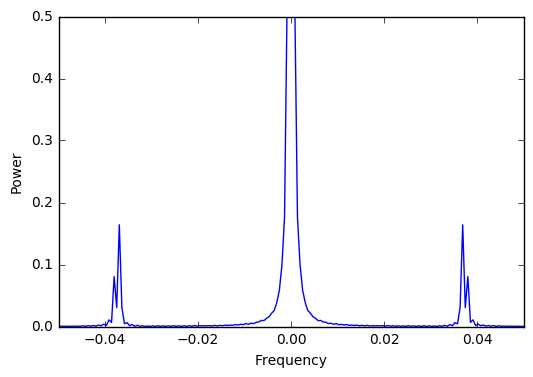

array([-0.03692393, -0.00194336, -0.00138812, -0.00083287, -0.00027762,
        0.00027762,  0.00083287,  0.00138812,  0.00194336,  0.03692393])

In [32]:
freq,fx = ugradio.dft.dft(sun3_volts[11], sun3_times[11])
power = np.abs(fx)**2
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.xlim(-.05, .05)
plt.ylim(0, 0.5)
plt.show()

spikes = np.where(power > 0.1)
freq[spikes]

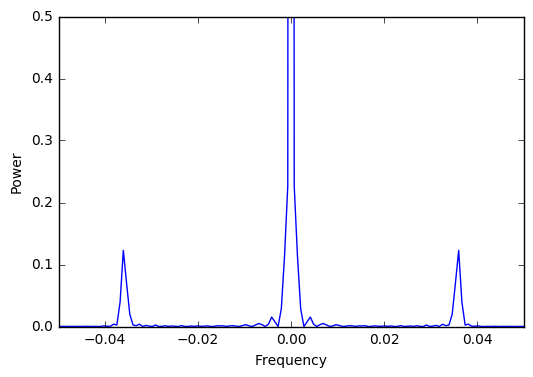

array([-0.4001387 , -0.19972261, -0.03606103, -0.00138696, -0.00069348,
        0.        ,  0.00069348,  0.00138696,  0.03606103,  0.19972261,
        0.4001387 ])

In [33]:
freq,fx = ugradio.dft.dft(sun3_volts[12], sun3_times[12])
power = np.abs(fx)**2
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.xlim(-.05, .05)
plt.ylim(0, 0.5)
plt.show()

spikes = np.where(power > 0.1)
freq[spikes]

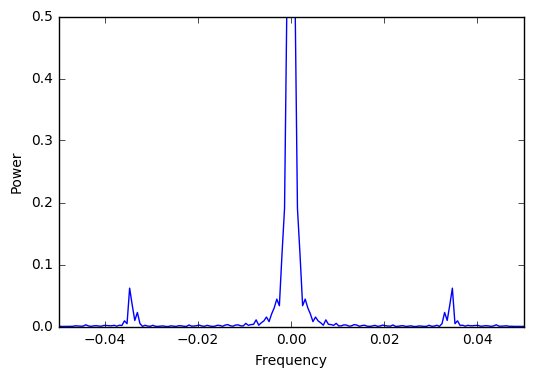

array([-0.03470294, -0.00305386, -0.00194336, -0.00138812, -0.00083287,
       -0.00027762,  0.00027762,  0.00083287,  0.00138812,  0.00194336,
        0.00305386,  0.03470294])

In [36]:
freq,fx = ugradio.dft.dft(sun3_volts[13], sun3_times[13])
power = np.abs(fx)**2
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.xlim(-.05, .05)
plt.ylim(0, 0.5)
plt.show()

spikes = np.where(power > 0.04)
freq[spikes]

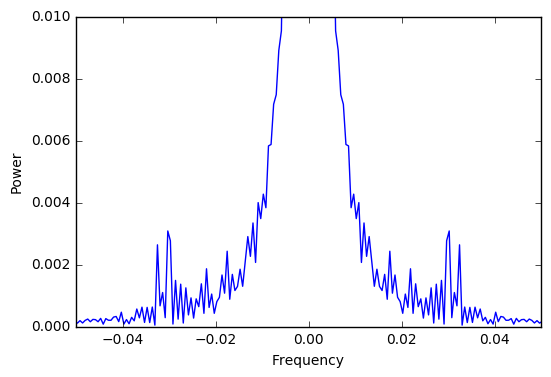

array([-0.03026097, -0.01193781, -0.01082732, -0.01027207, -0.00971682,
       -0.00916158, -0.00860633, -0.00805108, -0.00749584, -0.00694059,
       -0.00638534, -0.00583009, -0.00527485, -0.0047196 , -0.00416435,
       -0.00360911, -0.00305386, -0.00249861, -0.00194336, -0.00138812,
       -0.00083287, -0.00027762,  0.00027762,  0.00083287,  0.00138812,
        0.00194336,  0.00249861,  0.00305386,  0.00360911,  0.00416435,
        0.0047196 ,  0.00527485,  0.00583009,  0.00638534,  0.00694059,
        0.00749584,  0.00805108,  0.00860633,  0.00916158,  0.00971682,
        0.01027207,  0.01082732,  0.01193781,  0.03026097])

In [126]:
freq,fx = ugradio.dft.dft(sun3_volts[14], sun3_times[14])
power = np.abs(fx)**2
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.xlim(-.05, .05)
plt.ylim(0, 0.01)
plt.show()

spikes = np.where(power > 0.003)
freq[spikes]

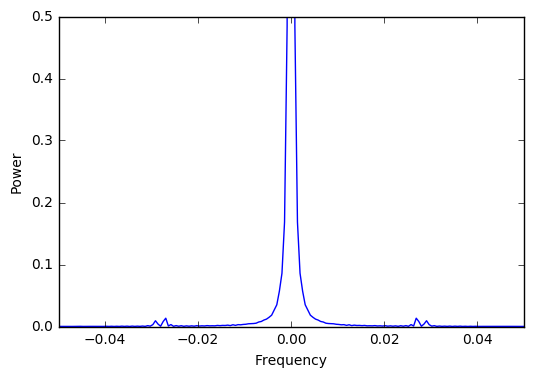

array([-0.02692948, -0.00583009, -0.00527485, -0.0047196 , -0.00416435,
       -0.00360911, -0.00305386, -0.00249861, -0.00194336, -0.00138812,
       -0.00083287, -0.00027762,  0.00027762,  0.00083287,  0.00138812,
        0.00194336,  0.00249861,  0.00305386,  0.00360911,  0.00416435,
        0.0047196 ,  0.00527485,  0.00583009,  0.02692948])

In [41]:
freq,fx = ugradio.dft.dft(sun3_volts[15], sun3_times[15])
power = np.abs(fx)**2
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.xlim(-.05, .05)
plt.ylim(0, 0.5)
plt.show()

spikes = np.where(power > 0.01)
freq[spikes]

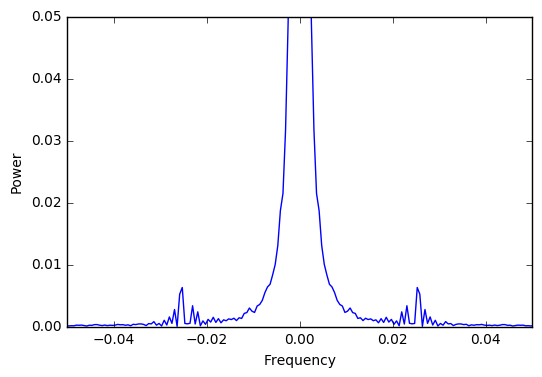

array([-0.02581899, -0.02526374, -0.00749584, -0.00694059, -0.00638534,
       -0.00583009, -0.00527485, -0.0047196 , -0.00416435, -0.00360911,
       -0.00305386, -0.00249861, -0.00194336, -0.00138812, -0.00083287,
       -0.00027762,  0.00027762,  0.00083287,  0.00138812,  0.00194336,
        0.00249861,  0.00305386,  0.00360911,  0.00416435,  0.0047196 ,
        0.00527485,  0.00583009,  0.00638534,  0.00694059,  0.00749584,
        0.02526374,  0.02581899])

In [122]:
freq,fx = ugradio.dft.dft(sun3_volts[16], sun3_times[16])
power = np.abs(fx)**2
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.xlim(-.05, .05)
plt.ylim(0, 0.05)
plt.show()

spikes = np.where(power > 0.005)
freq[spikes]

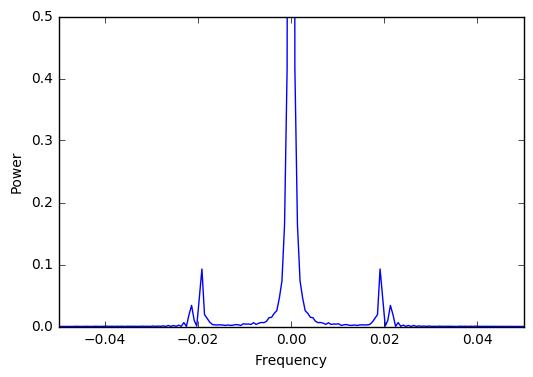

array([-0.01915602, -0.00138812, -0.00083287, -0.00027762,  0.00027762,
        0.00083287,  0.00138812,  0.01915602])

In [44]:
freq,fx = ugradio.dft.dft(sun3_volts[17], sun3_times[17])
power = np.abs(fx)**2
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.xlim(-.05, .05)
plt.ylim(0, 0.5)
plt.show()

spikes = np.where(power > 0.08)
freq[spikes]

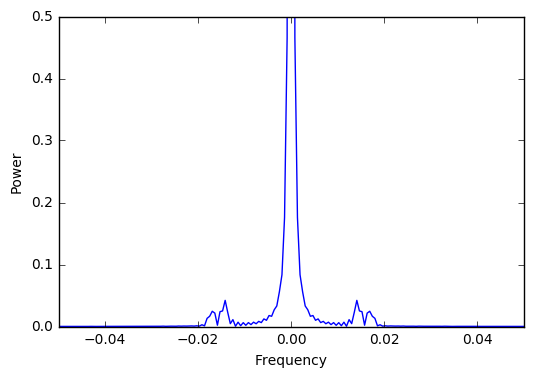

array([-0.0141588 , -0.00305386, -0.00249861, -0.00194336, -0.00138812,
       -0.00083287, -0.00027762,  0.00027762,  0.00083287,  0.00138812,
        0.00194336,  0.00249861,  0.00305386,  0.0141588 ])

In [47]:
freq,fx = ugradio.dft.dft(sun3_volts[18], sun3_times[18])
power = np.abs(fx)**2
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.xlim(-.05, .05)
plt.ylim(0, 0.5)
plt.show()

spikes = np.where(power > 0.03)
freq[spikes]

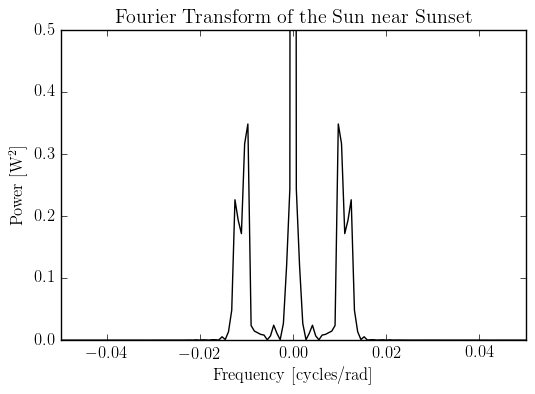

array([-0.4       , -0.2       , -0.00972222,  0.        ,  0.00972222,
        0.2       ,  0.4       ])

In [11]:
freq,fx = ugradio.dft.dft(sun3_volts[19], sun3_times[19])
power = np.abs(fx)**2
plt.plot(freq, power, "k")
plt.title("Fourier Transform of the Sun near Sunset")
plt.xlabel("Frequency [cycles/rad]")
plt.ylabel("Power [W^2]")
plt.xlim(-.05, .05)
plt.ylim(0, 0.5)
plt.show()

spikes = np.where(power > 0.33)
freq[spikes]

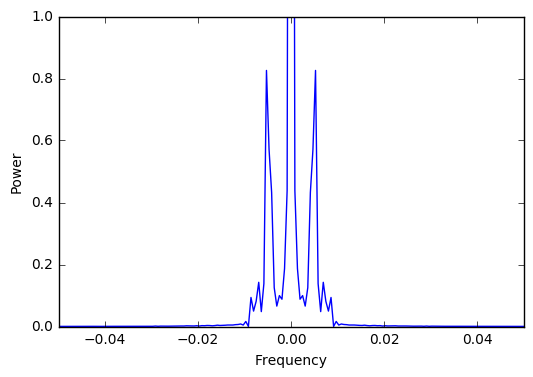

array([-0.00527485, -0.00027762,  0.00027762,  0.00527485])

In [54]:
freq,fx = ugradio.dft.dft(sun3_volts[20], sun3_times[20])
power = np.abs(fx)**2
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.xlim(-.05, .05)
plt.ylim(0, 1)
plt.show()

spikes = np.where(power > 0.7)
freq[spikes]

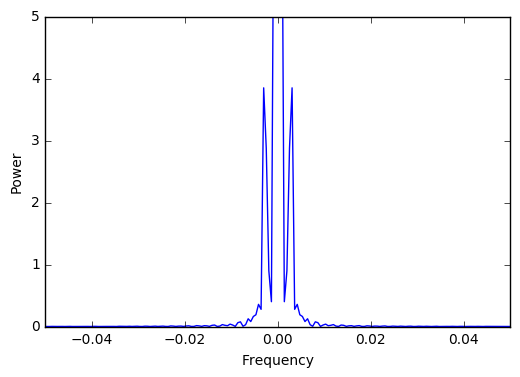

array([-0.00305386, -0.00083287, -0.00027762,  0.00027762,  0.00083287,
        0.00305386])

In [59]:
freq,fx = ugradio.dft.dft(sun3_volts[21], sun3_times[21])
power = np.abs(fx)**2
plt.plot(freq, power)
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.xlim(-.05, .05)
plt.ylim(0, 5)
plt.show()

spikes = np.where(power > 3)
freq[spikes]

Measured Local Fringe Frequencies w/ Approximate Times:

7:30-8:00: 0.01193781

8:00-8:30: 0.01915602

8:30-9:00: 0.02137701

9:00-9:30: 0.0267175573

9:30-10:00: 0.02862702

10:00-10:30: 0.0330372

10:30-11:00: 0.03525819

11:00-11:30: 0.03692393

11:30-12:00: 0.03747918

12:00-12:30: 0.03858967

12:30-1:00: 0.03858967

1:00-1:30: 0.03692393

1:30-2:00: 0.03606103

2:00-2:30: 0.03470294

2:30-3:00: 0.03026097

3:00-3:30: 0.02692948

3:30-4:00: 0.02526374

4:00-4:30: 0.01915602

4:30-5:00: 0.0141588

5:00-5:30: 0.00972222

In [8]:
lff_obs = [0.01193781, 0.01915602, 0.02137701, 0.0267175573, 0.02862702, 0.0330372, 0.03525819, 0.03692393, 0.03747918, 0.03858967, 0.03858967, 0.03692393, 0.03606103, 0.03470294, 0.03026097, 0.02692948, 0.02526374, 0.01915602, 0.0141588, 0.00972222]

## Determining the Baseline

In [4]:
def lff_sun(unixtimes, b_x, b_y):
    c = 299792458  # speed of light in meters/second
    f = 10.7e9     # sampling frequency of detectors in Hz
    wl = c/f*100   # wavelength in centimeters
    L = 37.8732    # terrestial latitude
    
    
    jd = ugradio.timing.julian_date(unixtimes)
    ra, dec = np.deg2rad(ugradio.coord.sunpos(jd))
    lst = ugradio.timing.lst(jd)
    ha = ra - lst  # hour angle in radians
    
    lff = (((b_x/wl)*np.cos(dec))*np.cos(ha) - ((b_y/wl)*np.sin(L)*np.cos(dec))*np.sin(ha)) * (2*np.pi/86164)
    return lff

In [5]:
unixtimes = []

for i in range(len(sun3_times)-1):
    avg_time = np.average(sun3_times[i])
    unixtimes.append(avg_time)

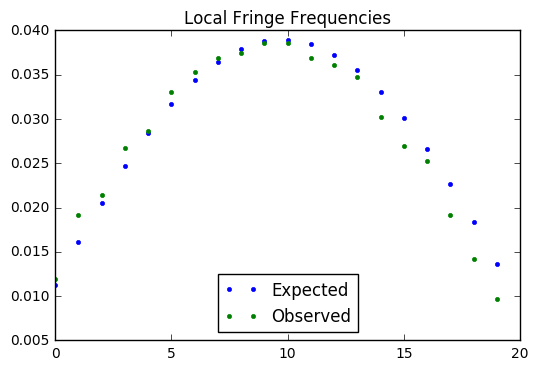

In [128]:
plt.plot(lff_exp, ".", label="Expected")
plt.plot(lff_obs, ".", label="Observed")
plt.title("Local Fringe Frequencies")
plt.legend(loc=8)
plt.show()

### Optimizing Chi-Squared

In [6]:
def chisq(data_obs, data_exp):
    data_obs = np.asarray(data_obs)
    data_exp = np.asarray(data_exp)
    sigmasq = np.var(data_exp)
    chisq = np.sum(np.abs(data_exp-data_obs)**2/sigmasq)
    return chisq

In [14]:
unixtimes = []

for i in range(len(sun3_times)-1):
    avg_time = np.average(sun3_times[i])
    unixtimes.append(avg_time)

In [9]:
b_x = np.linspace(1400, 1800, num=401)

chisq_b_x = [[], []]

for i in range(len(b_x)-1):
    
    lff_exp = []
    
    for j in range(len(unixtimes)-1):
        lff = lff_sun(unixtimes[j], b_x[i], 0)
        lff_exp.append(lff)
        
    chisq_value = chisq(lff_obs, lff_exp)
    chisq_b_x[0].append(chisq_value)
    chisq_b_x[1].append(b_x[i])

In [172]:
print "Lowest Chi-Squared:", chisq_b_x[0][np.argmin(chisq_b_x[0])]
print "East-West Baseline:", chisq_b_x[1][np.argmin(chisq_b_x[0])], "centimeters"

Lowest Chi-Squared: 1.0574919511449445
East-West Baseline: 1475.0 centimeters


In [177]:
b_y = np.linspace(0, 100, num=401)

chisq_b_y = [[], []]

for i in range(len(b_y)-1):
    
    lff_exp = []
    
    for j in range(len(unixtimes)-1):
        lff = lff_sun(unixtimes[j], 1475, b_y[i])
        lff_exp.append(lff)
        
    chisq_value = chisq(lff_obs, lff_exp)
    chisq_b_y[0].append(chisq_value)
    chisq_b_y[1].append(b_y[i])

In [178]:
print "Lowest Chi-Squared:", chisq_b_y[0][np.argmin(chisq_b_y[0])]
print "North-South Baseline:", chisq_b_y[1][np.argmin(chisq_b_y[0])], "centimeters"

Lowest Chi-Squared: 1.0574919511449445
North-South Baseline: 0.0 centimeters


Optimized separately, the EW baseline comes out to be 1475 cm and the NS baseline 0 cm.

In [182]:
b_x = np.linspace(1400, 1800, num=401)
b_y = np.linspace(0, 100, num=101)

chisq_baseline = [[], [], []]

for i in range(len(b_x)-1):
    
    for j in range(len(b_y)-1):
    
        lff_exp = []

        for k in range(len(unixtimes)-1):
            lff = lff_sun(unixtimes[k], b_x[i], b_y[j])
            lff_exp.append(lff)

        chisq_value = chisq(lff_obs, lff_exp)
        chisq_baseline[0].append(chisq_value)
        chisq_baseline[1].append(b_x[i])
        chisq_baseline[2].append(b_y[j])

In [183]:
print "Lowest Chi-Squared:", chisq_baseline[0][np.argmin(chisq_baseline[0])]
print "East-West Baseline:", chisq_baseline[1][np.argmin(chisq_baseline[0])], "centimeters"
print "North-South Baseline:", chisq_baseline[2][np.argmin(chisq_baseline[0])], "centimeters"

Lowest Chi-Squared: 1.0574919511449445
East-West Baseline: 1475.0 centimeters
North-South Baseline: 0.0 centimeters


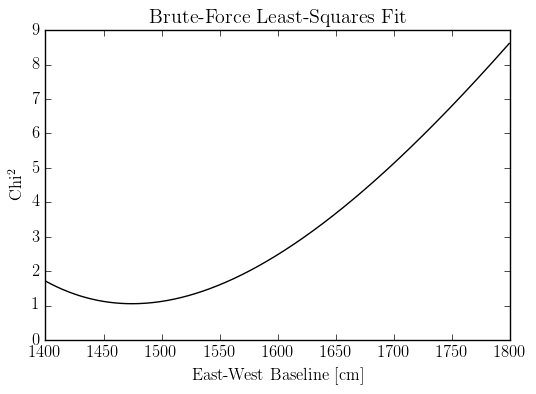

In [21]:
b_x = np.linspace(1400, 1800, num=401)
    
plt.plot(chisq_b_x[1], chisq_b_x[0], "k")
plt.title("Brute-Force Least-Squares Fit")
plt.xlabel("East-West Baseline [cm]")
plt.ylabel("Chi^2")
plt.ylim(0, 9)
plt.tick_params(axis='y', bottom=False)
plt.show()

In [22]:
curvature = np.gradient(chisq_b_x[0])

covariance = np.reciprocal(curvature)

lff_exp = []

for i in range(len(unixtimes)-1):
    lff = lff_sun(unixtimes[i], 1475, 0)
    lff_exp.append(lff)
    
sigmasq = np.var(lff_exp)
sigmasq_a = sigmasq*covariance

In [23]:
np.argmin(chisq_b_x[0])

75

In [24]:
print "Uncertainty:", sigmasq_a[75]

Uncertainty: 0.8409384444947653


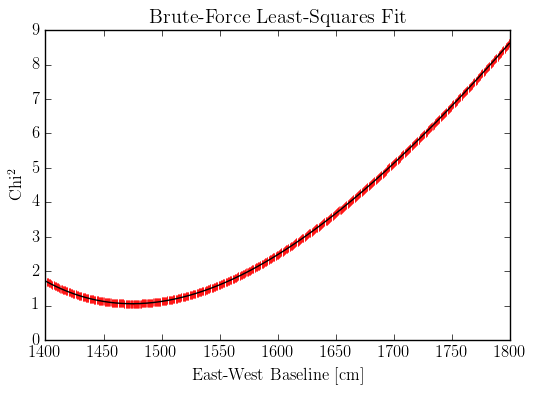

In [25]:
plt.errorbar(chisq_b_x[1], chisq_b_x[0], xerr=sigmasq_a, color="k", ecolor="r")
plt.title("Brute-Force Least-Squares Fit")
plt.xlabel("East-West Baseline [cm]")
plt.xlim(1400, 1800)
plt.ylabel("Chi^2")
plt.ylim(0, 9)
plt.tick_params(axis='y', bottom=False)
plt.show()

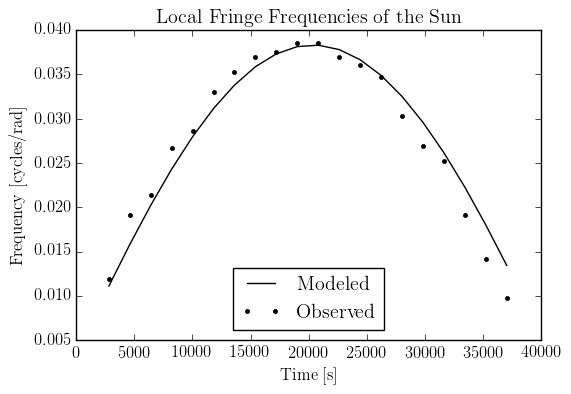

In [45]:
lff_exp = []
unixtimes_arr = []

for i in range(len(unixtimes)-1):
    lff = lff_sun(unixtimes[i], 1475, 0)
    lff_exp.append(lff)
    unixtimes_arr.append(unixtimes[i])
    
plt.plot(np.asarray(unixtimes_arr)-1.55387e9, lff_exp, 'k-', label='Modeled')
plt.plot(np.asarray(unixtimes_arr)-1.55387e9, lff_obs, 'k.', label='Observed')
plt.title('Local Fringe Frequencies of the Sun')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [cycles/rad]')
plt.legend(loc=8)
plt.show()

### More Precise Baseline Measurement?

In [42]:
b_x = np.linspace(1470, 1480, num=1001)

chisq_b_x = [[], []]

for i in range(len(b_x)-1):
    
    lff_exp = []
    
    for j in range(len(unixtimes)-1):
        lff = lff_sun(unixtimes[j], b_x[i], 0)
        lff_exp.append(lff)
        
    chisq_value = chisq(lff_obs, lff_exp)
    chisq_b_x[0].append(chisq_value)
    chisq_b_x[1].append(b_x[i])

In [43]:
print "Lowest Chi-Squared:", chisq_b_x[0][np.argmin(chisq_b_x[0])]
print "East-West Baseline:", chisq_b_x[1][np.argmin(chisq_b_x[0])], "centimeters"

Lowest Chi-Squared: 1.0574733182354246
East-West Baseline: 1474.58 centimeters
